In [1]:
import osmnx as ox
import networkx as nx
from ortools.constraint_solver import routing_enums_pb2
from ortools.constraint_solver import pywrapcp
import matplotlib.pyplot as plt
import numpy as np
import random

In [2]:
# 1. Obter o mapa da região do Campus Samambaia da UFG
location_point = (-16.6037, -49.2616)  # Coordenadas aproximadas do Campus Samambaia da UFG

radius = 4000
G = ox.graph_from_point(location_point, dist=radius, network_type='drive')

In [3]:
# 2. Modelar o grafo
nodes, edges = ox.graph_to_gdfs(G, nodes=True, edges=True)
G = nx.convert_node_labels_to_integers(G)  # Convertendo labels para inteiros

In [4]:
# Função auxiliar para extrair coordenadas de um nó
def get_node_coords(G, node):
    point = G.nodes[node]['x'], G.nodes[node]['y']
    return point

# Resolução do problema de roteamento com rotas aleatórias
def solve_random_vrp(G, num_vehicles, depot):
    nodes = list(G.nodes)
    routes = []
    for _ in range(num_vehicles):
        route_length = random.randint(5, 10)  # Comprimento aleatório da rota
        route = [depot] + random.sample(nodes, route_length) + [depot]
        routes.append(route)
    return routes

# Função para gerar as rotas no grafo
def generate_graph_routes(G, routes):
    graph_routes = []
    for route in routes:
        graph_route = []
        for i in range(len(route) - 1):
            try:
                path = nx.shortest_path(G, source=route[i], target=route[i + 1], weight='length')
                graph_route.extend(path)
            except nx.NetworkXNoPath:
                pass  # Ignora se não houver caminho
        graph_routes.append(graph_route)
    return graph_routes

# Visualização da solução com rotas geradas pelo grafo
def plot_graph_routes(G, routes, depot):
    colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']
    fig, ax = ox.plot_graph(G, show=False, close=False, node_size=0)
    
    for route, color in zip(routes, colors):
        route_nodes = [get_node_coords(G, node) for node in route]
        x, y = zip(*route_nodes)
        ax.plot(x, y, color)
    
    # Destacar o ponto de origem em amarelo
    depot_coords = get_node_coords(G, depot)
    ax.scatter(*depot_coords, c='yellow', s=100, zorder=5)
    
    plt.show()

In [5]:
# Executar a resolução com rotas aleatórias
depot = random.choice(list(G.nodes))  # Seleciona um nó aleatório como ponto de origem
random_routes = solve_random_vrp(G, 3, depot)
graph_routes = generate_graph_routes(G, random_routes)

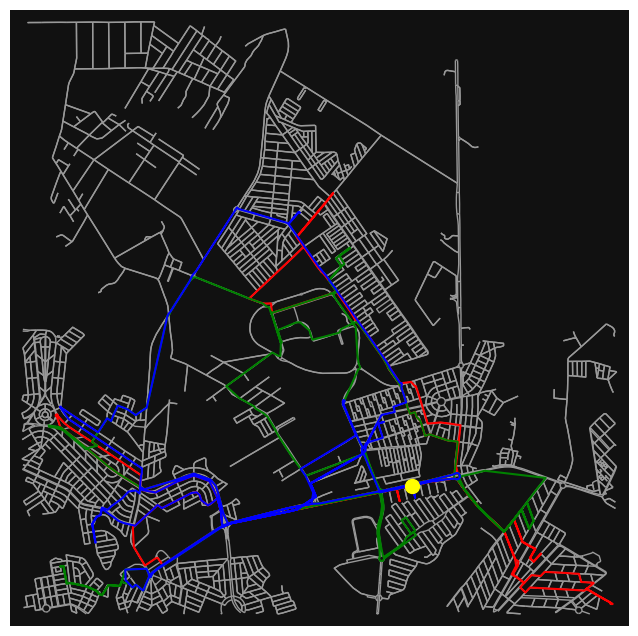

In [6]:
if graph_routes:
    plot_graph_routes(G, graph_routes, depot)
else:
    print("Nenhuma solução encontrada.")